# Practical Lab 3
# Waseem Raja Shaik
# 8894805

**Lab 3**

This lab provides insight into the concepts of Supervised Learning -Regression algorithms.

**Part A:**

Problem Statement: Consider the dataset Credit Card Fraud Detection from Kaggle and build a machine-learning model that detects whether a credit card transaction is fraudulent. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using the logistic regression to build the model, and evaluate to determine the accuracy.
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score

# kept creditcard csv in practical labs folder but didn't pushed it
creditcard = pd.read_csv('../../practical_labs/creditcard.csv')

In [2]:
# Explore the dataset
display(creditcard.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# From above it's clear that no categorical variables
display(creditcard.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

In [4]:
# note from above no null values
display(creditcard.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Cleaning

In [5]:
# Checking Duplicate rows
print("Number of duplicate rows:", creditcard.duplicated().sum())

Number of duplicate rows: 1081


In [6]:
# Remove duplicate rows
creditcard.drop_duplicates(inplace=True)

# Reset the index after removing duplicates
creditcard.reset_index(drop=True, inplace=True)

In [7]:
print("Number of duplicate rows:", creditcard.duplicated().sum())

Number of duplicate rows: 0


### Based on the Credit Card Fraud Detection Description
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

In [8]:
print('Number of normal transaction',len(creditcard[creditcard.Class == 0]))
print('Number of fraud transaction',len(creditcard[creditcard.Class == 1]))

Number of normal transaction 283253
Number of fraud transaction 473


In [9]:
# Standardize the 'Amount' column for better model fit and visualization
scaler = StandardScaler()
creditcard['Amount'] = scaler.fit_transform(creditcard['Amount'].values.reshape(-1, 1))
display(creditcard)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [10]:
# Can drop Time because we don't need it for this problem.
creditcard = creditcard.drop('Time', axis=1)
display(creditcard)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [11]:
X = creditcard.drop('Class',axis=1)
y = creditcard['Class']
display(X)
display(y)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391


0         0
1         0
2         0
3         0
4         0
         ..
283721    0
283722    0
283723    0
283724    0
283725    0
Name: Class, Length: 283726, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [13]:
display(X_train)
display(y_train)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
166591,-0.964795,0.132282,0.321522,-0.531521,1.862187,-1.061468,0.422736,0.090295,-0.583994,-0.970915,...,0.146258,-0.155644,-0.759017,0.091222,0.658175,-0.310583,0.117332,0.033405,0.173849,-0.345419
164375,0.316498,-3.180060,-1.861250,0.539767,-0.245426,2.087610,0.309722,0.400039,0.835011,-0.402224,...,1.391876,0.139184,-1.271068,-0.209311,-0.935940,-1.076762,0.140895,-0.159712,0.073570,2.933388
221063,-0.443177,1.015020,-0.349551,0.123434,1.768560,-0.425493,1.615046,-0.370257,-0.670636,-0.442797,...,-0.113430,0.115133,0.466067,-0.433316,-1.028329,0.341297,-0.506957,0.015903,0.194750,-0.218901
222779,-2.924351,3.037665,-2.898516,-0.446169,-1.094434,-1.126350,-1.101754,2.254077,-0.459852,-0.513222,...,-0.290737,0.542826,1.211062,0.271448,0.714775,-0.439406,-0.246126,-0.139805,0.051395,-0.338990
266360,-0.230649,0.315261,-0.541387,-1.494509,3.321725,3.479110,0.470314,0.681980,-0.395329,-0.355487,...,0.114883,-0.241149,-0.633826,-0.017286,0.704977,-0.474717,0.230399,-0.060045,-0.074326,-0.345419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,1.221811,-0.622699,0.271691,-0.507132,-1.093817,-1.303639,-0.166317,-0.390254,-1.080318,0.583673,...,0.313441,0.302138,0.641491,-0.168266,0.791311,0.586821,-0.150528,-0.016895,0.032471,0.068200
117583,1.069132,-0.159789,1.913486,2.811710,-0.690517,1.942449,-1.259828,0.577277,1.031453,0.163542,...,-0.115446,0.046602,0.725405,-0.199566,-0.678442,0.552088,0.328766,0.118229,0.029660,-0.353327
73349,-0.891311,0.808612,1.263076,0.522615,1.183978,0.905303,0.565347,0.186910,-1.042086,-0.096321,...,0.078784,0.129436,0.443403,-0.327563,-1.315188,0.647441,-0.057036,-0.014691,0.038455,-0.281681
267336,-0.358224,1.446564,-1.175105,0.075659,2.041475,-1.677117,1.568559,-0.415562,-1.073097,-1.734897,...,0.128571,0.078727,0.333168,-0.350660,0.947248,0.196432,0.700004,0.079430,0.208233,-0.350292


166591    0
164375    0
221063    0
222779    0
266360    0
         ..
21440     0
117583    0
73349     0
267336    0
128037    0
Name: Class, Length: 212794, dtype: int64

## Model Training and Evaluation (Logistic Regression)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9991717477883904
Confusion Matrix:
[[56650     6]
 [   41    49]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.54      0.68        90

    accuracy                           1.00     56746
   macro avg       0.95      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746



- The accuracy is very high (99.92%), but accuracy alone may not be sufficient for imbalanced datasets like credit card fraud detection, where the number of non-fraudulent transactions is much higher than fraudulent ones.
- The model's precision is good (86%), meaning that when it predicts a transaction as fraudulent, it is correct most of the time.
- The recall is relatively low (55%), suggesting that the model missed some fraudulent transactions, indicating room for improvement.
- The F1-score considers both precision and recall and provides a more balanced measure of the model's performance on class 1. It is 0.67, indicating a reasonable balance between precision and recall.
- The confusion matrix gives insights into the type of errors the model is making: 60 fraudulent transactions were classified as non-fraudulent (false negatives), and 12 non-fraudulent transactions were classified as fraudulent (false positives).


**Part B:**

Problem Statement: Use the following insurance dataset and build a predictive system to predict insurance costs. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using linear regression to build the model, and evaluate the accuracy of predicting the insurance cost.
https://www.kaggle.com/datasets/mirichoi0218/insurance 


In [18]:
# kept creditcard csv in practical labs folder but didn't pushed it
insurance = pd.read_csv('../../practical_labs/insurance.csv')

In [19]:
# Explore the dataset
display(insurance.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
# From above it's clear that categorical variables are there
display(insurance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

In [21]:
# No null values as shown above
categorical_columns = ['sex', 'smoker', 'region']
# Now changing catergorical variables into numeric variables
label_encoder = LabelEncoder()
for cat_col in categorical_columns:
    insurance[cat_col] = label_encoder.fit_transform(insurance[cat_col])

display(insurance)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [22]:
print("Number of duplicate rows:", insurance.duplicated().sum())

# Remove duplicate rows
insurance.drop_duplicates(inplace=True)

# Reset the index after removing duplicates
insurance.reset_index(drop=True, inplace=True)

Number of duplicate rows: 1


In [23]:
print("Number of duplicate rows:", insurance.duplicated().sum())

Number of duplicate rows: 0


In [24]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation (Linear Regression)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"R-squared (R2) Score: {r2_score(y_test, y_pred)}")


Mean Squared Error (MSE): 35493102.61165051
Root Mean Squared Error (RMSE): 5957.608799816459
Mean Absolute Error (MAE): 4182.353155288296
R-squared (R2) Score: 0.8068466322629112


Based on the results:

- Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted insurance costs and the actual insurance costs. A lower MSE value indicates that the model's predictions are closer to the actual values.

- Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE. It provides a more interpretable metric by giving us the error in the same unit as the target variable. In this case, the RMSE is approximately 6239.81, which means, on average, the model's predictions are off by about $6239.81 in insurance costs.

- Mean Absolute Error (MAE): The MAE measures the average absolute difference between the predicted and actual insurance costs. Like the RMSE, it provides a sense of how far off the predictions are from the true values. The MAE is approximately 4182.80, which means the average absolute difference between the predicted and actual insurance costs is about $4182.80.

- R-squared (R2) Score: The R-squared score is a value between 0 and 1 that represents the proportion of the variance in the target variable (insurance costs) that can be explained by the model. In this case, the R-squared score is approximately 0.77, which means that around 77% of the variance in insurance costs is explained by the model. A higher R-squared score indicates a better fit of the model to the data.

Overall, the model seems to have some predictive power, as indicated by the R-squared score. However, the relatively high RMSE and MAE suggest that there is room for improvement in predicting insurance costs more accurately. Possible enhancements could involve feature engineering, using more sophisticated regression models, or exploring other machine learning algorithms to improve the predictions.

### Graphical Representation.

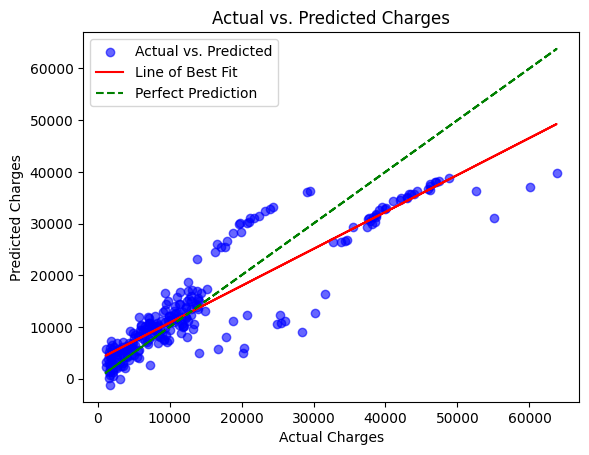

In [29]:
plt.scatter(y_test, y_pred, alpha=0.6, color='b', label='Actual vs. Predicted')
fit_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(fit_line, y_test), color='r', label='Line of Best Fit')
plt.plot(y_test, y_test, color='g', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.legend()
plt.show()


**Notes:**

This lab should be submitted as a notebook and an HTML. Follow https://docs.github.com/en/pages/quickstart.